In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('sales.csv')

In [4]:
df.tail()

,month,sales
31,2021-08,1573
32,2021-09,3528
33,2021-10,5211
34,2021-11,7614
35,2021-12,9254


In [5]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,2019-01,2815
1,2019-02,2672
2,2019-03,2755
3,2019-04,2721
4,2019-05,2946


In [6]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])
df.head()

,Month,Sales
0,2019-01-01,2815
1,2019-02-01,2672
2,2019-03-01,2755
3,2019-04-01,2721
4,2019-05-01,2946


In [102]:
df.shape

(36, 2)

In [7]:
df.set_index('Month',inplace=True)

In [8]:
df.head()

,Sales
Month,
2019-01-01,2815
2019-02-01,2672
2019-03-01,2755
2019-04-01,2721
2019-05-01,2946


In [105]:
df.describe()

,Sales
count,36.000000
mean,3893.333333
std,1853.462335
min,1573.000000
25%,2800.000000
50%,3245.000000
75%,4110.500000
max,9254.000000


## Step 2: Visualize the Data

<AxesSubplot:xlabel='Month'>

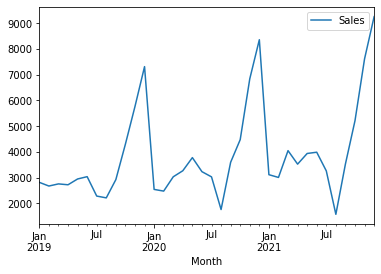

In [9]:
df.plot()

In [107]:
### Testing For Stationarity using Dickey-Fuller test

from statsmodels.tsa.stattools import adfuller

In [108]:
test_result=adfuller(df['Sales'])

In [109]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [110]:
adfuller_test(df['Sales'])

ADF Test Statistic : -0.9197731834254832
p-value : 0.7813911051407633
#Lags Used : 10
Number of Observations Used : 25
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Auto Regressive Model

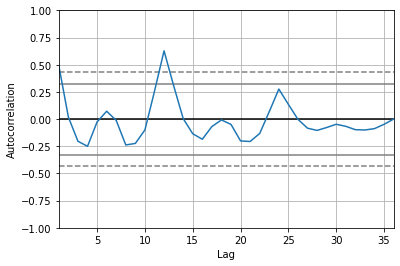

In [116]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [52]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [53]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\maria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\maria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\maria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [54]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -307.314
Date:                Tue, 25 Jan 2022   AIC                            620.628
Time:                        18:14:32   BIC                            625.294
Sample:                    01-01-2019   HQIC                           622.238
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6579      0.604      1.089      0.276      -0.526       1.841
ma.L1         -0.9032      0.514     -1.756      0.079      -1.911       0.105
sigma2      2.441e+06   6.45e+05      3.785      0.000    1.18e+06    3.71e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.60   Jarque-Bera (JB):                 6.94
Prob(Q):                              0.44   Prob(JB):                         0.03
Heteroskedasticity (H):               1.56   Skew:                            -0.86
Prob(H) (two-sided):                  0.45   Kurtosis:                         4.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

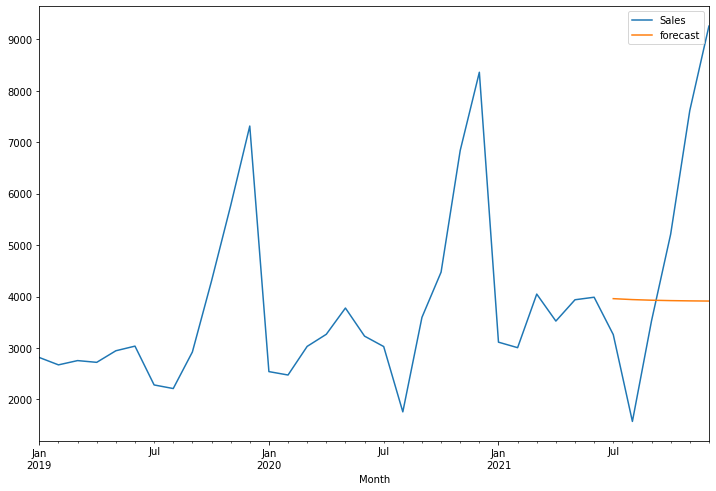

In [60]:
df['forecast']=model_fit.predict(start=30,end=35,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))


O modelo Arima nao consegue lidar com dados que variem de acordo com a epoca e por isso vamos testar o modelo SARIMAX, conhecido por ter essa carateristica.

In [120]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\maria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\maria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\maria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\maria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge

In [91]:
results.predict(start=30,end=35,dynamic=True)


2021-07-01    3616.660282
2021-08-01    2037.717039
2021-09-01    4121.681433
2021-10-01    4917.681124
2021-11-01    7530.044598
2021-12-01    9243.411011
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Month'>

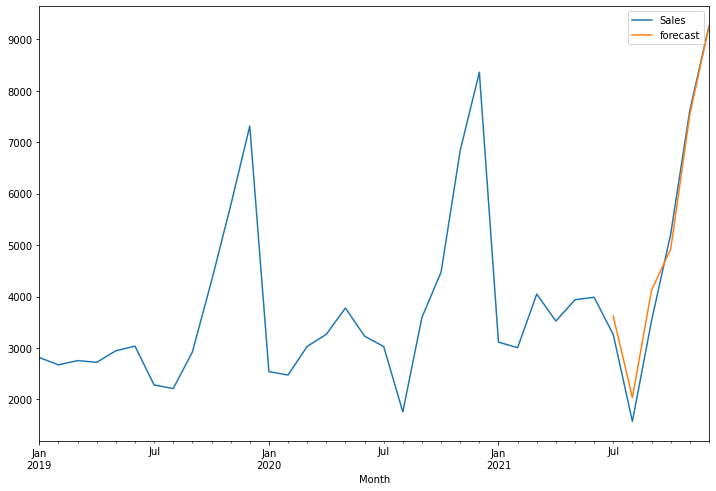

In [84]:
df['forecast']=results.predict(start=30,end=35,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [68]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [69]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [70]:
future_datest_df.tail()

,Sales,forecast
2023-07-01,NaN,NaN
2023-08-01,NaN,NaN
2023-09-01,NaN,NaN
2023-10-01,NaN,NaN
2023-11-01,NaN,NaN


In [71]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

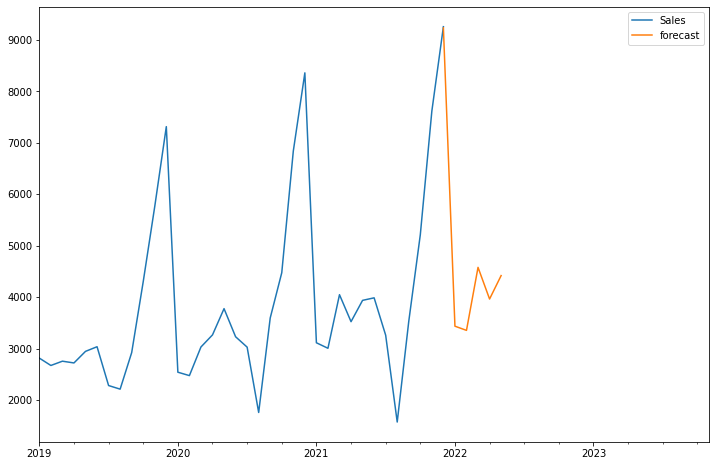

In [93]:
future_df['forecast'] = results.predict(start = 35, end = 40, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))


In [95]:
print(results.predict(start = 35, end = 40, dynamic= True))


2021-12-01    9229.985398
2022-01-01    3435.180079
2022-02-01    3353.794044
2022-03-01    4577.904445
2022-04-01    3962.974363
2022-05-01    4418.130914
Freq: MS, Name: predicted_mean, dtype: float64


In [79]:
print(df["Sales"])

Month
2019-01-01    2815
2019-02-01    2672
2019-03-01    2755
2019-04-01    2721
2019-05-01    2946
2019-06-01    3036
2019-07-01    2282
2019-08-01    2212
2019-09-01    2922
2019-10-01    4301
2019-11-01    5764
2019-12-01    7312
2020-01-01    2541
2020-02-01    2475
2020-03-01    3031
2020-04-01    3266
2020-05-01    3776
2020-06-01    3230
2020-07-01    3028
2020-08-01    1759
2020-09-01    3595
2020-10-01    4474
2020-11-01    6838
2020-12-01    8357
2021-01-01    3113
2021-02-01    3006
2021-03-01    4047
2021-04-01    3523
2021-05-01    3937
2021-06-01    3986
2021-07-01    3260
2021-08-01    1573
2021-09-01    3528
2021-10-01    5211
2021-11-01    7614
2021-12-01    9254
Name: Sales, dtype: int64
